In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable

In [2]:
# Load the train.pkl
with open('train_X.pkl','rb') as f:
    train_X = pickle.load(f)

In [3]:
with open('train_y.pkl','rb') as f:
    train_y = pickle.load(f)
# train_y = train_y.ravel()

In [4]:
train_X.shape, train_y.shape

((900, 281), (900,))

In [5]:
# Load the cv.pkl
with open('cv_X.pkl','rb') as f:
    cv_X = pickle.load(f)

In [6]:
with open('cv_y.pkl','rb') as f:
    cv_y = pickle.load(f)
# cv_y = cv_y.ravel()

In [7]:
cv_X.shape, cv_y.shape

((225, 281), (225,))

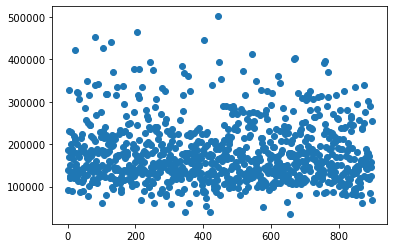

In [8]:
# Let see how SalePrice look like in graph
plt.scatter(np.arange(train_y.shape[0]),train_y)
plt.show()

In [9]:
def error_score(actual_y, predict_y):
    actual_y = np.log(actual_y)
    predict_y = np.log(predict_y)
    return np.sqrt(np.mean((actual_y-predict_y)**2))

# RandomForest Regression

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
params = {
    'n_estimators':[10,20,30,50,100,200,300,500],
    'max_depth':[2,5,7,10,20,50],
    'max_samples': [20,30,50]
}

In [12]:
tracking = []
for n in params['n_estimators']:
    for d in params['max_depth']:
        for s in params['max_samples']:
            rf_model = RandomForestRegressor(n_estimators=n, max_depth=d, max_samples=s,random_state=1, 
                                             criterion='mse',oob_score=True)
            rf_model.fit(train_X,train_y)
            tr_pred = rf_model.predict(train_X)
            tr_score = error_score(train_y,tr_pred)
            cv_pred = rf_model.predict(cv_X)
            cv_score = error_score(cv_y,cv_pred)
            tracking.append([n,d,s,tr_score,cv_score])

In [13]:
x = PrettyTable()
x.field_names = (['S.No','n_estimatores','max_depth','max_samples','tr_score','cv_score'])
for i,z in enumerate(tracking):
    x.add_row([i,z[0],z[1],z[2],z[3],z[4]])

In [14]:
print(x)

+------+---------------+-----------+-------------+---------------------+---------------------+
| S.No | n_estimatores | max_depth | max_samples |       tr_score      |       cv_score      |
+------+---------------+-----------+-------------+---------------------+---------------------+
|  0   |       10      |     2     |      20     | 0.25806164326484343 |  0.2342016531373006 |
|  1   |       10      |     2     |      30     | 0.24197065196731785 | 0.21763580707528563 |
|  2   |       10      |     2     |      50     |  0.235861312884767  | 0.21693729154086203 |
|  3   |       10      |     5     |      20     | 0.24305414464750172 |  0.2171943804051583 |
|  4   |       10      |     5     |      30     | 0.19923929033686522 | 0.17629491298323277 |
|  5   |       10      |     5     |      50     | 0.19051732598880533 |  0.1813092023635192 |
|  6   |       10      |     7     |      20     |  0.2412490638997674 | 0.21410110705767574 |
|  7   |       10      |     7     |      30     |

In [15]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=50, max_samples=50, oob_score=True, random_state=1,
                                criterion='mse')
rf_model.fit(train_X,train_y)

RandomForestRegressor(max_depth=50, max_samples=50, n_estimators=200,
                      oob_score=True, random_state=1)

In [16]:
with open('rf_model.pkl','wb') as f:
    pickle.dump(rf_model,f)